In [1]:
from pyforest import *
d=pd.read_excel('CapDATASET.xlsx')


In [2]:
d1=d.copy()
d2=d.copy()
d.head()

,Unnamed: 0,agent_state,application_type,case_status,employer_yr_estab,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_training,...,level,source_name,sector,case_received_date_year,decision_date_year,meansal,Enterprise_Size,continent,duration,class_of_admsn
0,0,Other,PERM,Certified,New,Northeast,Other,Unavailable,Unavailable,Unavailable,...,Level II,OES,IT,2007,2012,75629.000,Unavailable,Asia,5,J-1
1,1,Other,PERM,Denied,New,Northeast,Other,Unavailable,Unavailable,Unavailable,...,Level I,OES,Other Economic Sector,2007,2011,37024.000,Unavailable,Europe,4,B-2
2,2,Other,PERM,Certified,New,South,Other,Unavailable,Unavailable,Unavailable,...,Level I,OES,Aerospace,2007,2011,47923.000,Unavailable,Asia,4,H-1B
3,3,Other,PERM,Certified,New,Northeast,Other,Unavailable,Unavailable,Unavailable,...,Level II,OES,Other Economic Sector,2007,2011,10975.485,Unavailable,Asia,4,B-2
4,4,Other,PERM,Certified,New,Northeast,Other,Unavailable,Unavailable,Unavailable,...,Level IV,OES,Advanced Mfg,2007,2012,97445.000,Unavailable,North America,5,L-1


In [3]:
d.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
d.head()

,agent_state,application_type,case_status,employer_yr_estab,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_training,job_work_state,level,source_name,sector,case_received_date_year,decision_date_year,meansal,Enterprise_Size,continent,duration,class_of_admsn
0,Other,PERM,Certified,New,Northeast,Other,Unavailable,Unavailable,Unavailable,Northeast,Level II,OES,IT,2007,2012,75629.000,Unavailable,Asia,5,J-1
1,Other,PERM,Denied,New,Northeast,Other,Unavailable,Unavailable,Unavailable,Northeast,Level I,OES,Other Economic Sector,2007,2011,37024.000,Unavailable,Europe,4,B-2
2,Other,PERM,Certified,New,South,Other,Unavailable,Unavailable,Unavailable,South,Level I,OES,Aerospace,2007,2011,47923.000,Unavailable,Asia,4,H-1B
3,Other,PERM,Certified,New,Northeast,Other,Unavailable,Unavailable,Unavailable,Northeast,Level II,OES,Other Economic Sector,2007,2011,10975.485,Unavailable,Asia,4,B-2
4,Other,PERM,Certified,New,Northeast,Other,Unavailable,Unavailable,Unavailable,Northeast,Level IV,OES,Advanced Mfg,2007,2012,97445.000,Unavailable,North America,5,L-1


In [5]:
def target(x):
    if x=="Certified":
        return 0
    elif x=="Certified-Expired":
        return 1
    elif x=='Denied':
        return 2
    else:
        return 3
d.case_status=d.case_status.apply(target)

In [6]:
d.duplicated().sum()

74610

In [7]:
d.drop_duplicates(keep='first',inplace=True)
d.head()

,agent_state,application_type,case_status,employer_yr_estab,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_training,job_work_state,level,source_name,sector,case_received_date_year,decision_date_year,meansal,Enterprise_Size,continent,duration,class_of_admsn
0,Other,PERM,0,New,Northeast,Other,Unavailable,Unavailable,Unavailable,Northeast,Level II,OES,IT,2007,2012,75629.000,Unavailable,Asia,5,J-1
1,Other,PERM,2,New,Northeast,Other,Unavailable,Unavailable,Unavailable,Northeast,Level I,OES,Other Economic Sector,2007,2011,37024.000,Unavailable,Europe,4,B-2
2,Other,PERM,0,New,South,Other,Unavailable,Unavailable,Unavailable,South,Level I,OES,Aerospace,2007,2011,47923.000,Unavailable,Asia,4,H-1B
3,Other,PERM,0,New,Northeast,Other,Unavailable,Unavailable,Unavailable,Northeast,Level II,OES,Other Economic Sector,2007,2011,10975.485,Unavailable,Asia,4,B-2
4,Other,PERM,0,New,Northeast,Other,Unavailable,Unavailable,Unavailable,Northeast,Level IV,OES,Advanced Mfg,2007,2012,97445.000,Unavailable,North America,5,L-1


In [22]:
d.class_of_admsn.unique()

array(['J-1', 'B-2', 'H-1B', 'L-1', 'EWI', 'E-2', 'Other', 'E-1', 'H-2B',
       'TPS', 'F-1', 'B-1', 'C-1', 'TN', 'H-4', 'O-1', 'R-1', 'L-2', 'Q',
       'F-2', 'H-1B1', 'parole', 'G-5', 'E-3', 'H-2A', 'VWT', 'P-1',
       'A1/A2', 'D-1', 'A-3', 'R-2', 'H-1C', 'H-3', 'J-2', 'P-4', 'I',
       'H-1A', 'G-1', 'VWB', 'G-4', 'P-3', 'AOS/H-1B', 'O-3', 'O-2',
       'H1B', 'N', 'T-1', 'TD', 'M-1', 'K-1', 'U-1', 'AOS', 'P-2', 'C-3',
       'V-2', 'M-2'], dtype=object)

In [23]:
def h1(x):
    if x=='H1B' or x=='H-2B' or x=='H-1B1' or x=='H-1A' or x=='H1B' or x=='H-1B' or x=='H-1C' or x=='H-3':
        return 1
    else:
        return 0
d.class_of_admsn=d.class_of_admsn.apply(h1)
d.head()

,agent_state,application_type,case_status,employer_yr_estab,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_training,job_work_state,level,source_name,sector,case_received_date_year,decision_date_year,meansal,Enterprise_Size,continent,duration,class_of_admsn
0,Other,PERM,0,New,Northeast,Other,Unavailable,Unavailable,Unavailable,Northeast,Level II,OES,IT,2007,2012,75629.000,Unavailable,Asia,5,0
1,Other,PERM,2,New,Northeast,Other,Unavailable,Unavailable,Unavailable,Northeast,Level I,OES,Other Economic Sector,2007,2011,37024.000,Unavailable,Europe,4,0
2,Other,PERM,0,New,South,Other,Unavailable,Unavailable,Unavailable,South,Level I,OES,Aerospace,2007,2011,47923.000,Unavailable,Asia,4,1
3,Other,PERM,0,New,Northeast,Other,Unavailable,Unavailable,Unavailable,Northeast,Level II,OES,Other Economic Sector,2007,2011,10975.485,Unavailable,Asia,4,0
4,Other,PERM,0,New,Northeast,Other,Unavailable,Unavailable,Unavailable,Northeast,Level IV,OES,Advanced Mfg,2007,2012,97445.000,Unavailable,North America,5,0


In [24]:
dummy=pd.get_dummies(d,drop_first=True)

In [25]:
f=dummy.case_status
dummy.drop('case_status',axis=1,inplace=True)

In [31]:
from scipy.stats import zscore
dummy.columns

Index(['case_received_date_year', 'decision_date_year', 'meansal', 'duration',
       'class_of_admsn', 'agent_state_Midwest', 'agent_state_Northeast',
       'agent_state_Other', 'agent_state_South', 'agent_state_West',
       'application_type_ONLINE', 'application_type_PERM',
       'application_type_Unavailable', 'employer_yr_estab_New',
       'employer_yr_estab_Old', 'employer_state_Midwest',
       'employer_state_Northeast', 'employer_state_South',
       'employer_state_West', 'foreign_worker_info_education_Bachelor's',
       'foreign_worker_info_education_Doctorate',
       'foreign_worker_info_education_High School',
       'foreign_worker_info_education_Master's',
       'foreign_worker_info_education_Other',
       'foreign_worker_info_major_Business Administration',
       'foreign_worker_info_major_Computer Applications',
       'foreign_worker_info_major_Economics',
       'foreign_worker_info_major_Engineer',
       'foreign_worker_info_major_Information Systems',
   

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
e=pd.DataFrame(sc.fit_transform(dummy),columns=dummy.columns)

In [28]:
e.head()

,case_received_date_year,decision_date_year,meansal,duration,class_of_admsn,agent_state_Midwest,agent_state_Northeast,agent_state_Other,agent_state_South,agent_state_West,...,sector_Transportation,sector_Unavailable,Enterprise_Size_Medium,Enterprise_Size_Small,Enterprise_Size_Unavailable,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,-4.543199,-1.929047,-0.056525,6.070237,-1.635051,-0.309702,-0.433124,1.226639,-0.434265,-0.493353,...,-0.055976,-1.464666,-0.45059,-0.47106,1.411993,0.553251,-0.278942,-0.351149,-0.084846,-0.167933
1,-4.543199,-2.660181,-0.060863,4.689044,-1.635051,-0.309702,-0.433124,1.226639,-0.434265,-0.493353,...,-0.055976,-1.464666,-0.45059,-0.47106,1.411993,-1.807498,3.584971,-0.351149,-0.084846,-0.167933
2,-4.543199,-2.660181,-0.059639,4.689044,0.611602,-0.309702,-0.433124,1.226639,-0.434265,-0.493353,...,-0.055976,-1.464666,-0.45059,-0.47106,1.411993,0.553251,-0.278942,-0.351149,-0.084846,-0.167933
3,-4.543199,-2.660181,-0.063791,4.689044,-1.635051,-0.309702,-0.433124,1.226639,-0.434265,-0.493353,...,-0.055976,-1.464666,-0.45059,-0.47106,1.411993,0.553251,-0.278942,-0.351149,-0.084846,-0.167933
4,-4.543199,-1.929047,-0.054074,6.070237,-1.635051,-0.309702,-0.433124,1.226639,-0.434265,-0.493353,...,-0.055976,-1.464666,-0.45059,-0.47106,1.411993,-1.807498,-0.278942,2.847795,-0.084846,-0.167933


In [32]:
cov_matrix=np.cov(e.T)
print("covariance_matrix \n",cov_matrix) 


covariance_matrix 
 [[ 1.00000344  0.88390317 -0.07619051 ... -0.04744153  0.0032048
  -0.02518552]
 [ 0.88390317  1.00000344 -0.05713215 ... -0.03763383  0.00226857
  -0.01765815]
 [-0.07619051 -0.05713215  1.00000344 ...  0.01194122 -0.0028298
   0.00430705]
 ...
 [-0.04744153 -0.03763383  0.01194122 ...  1.00000344 -0.02979359
  -0.05896964]
 [ 0.0032048   0.00226857 -0.0028298  ... -0.02979359  1.00000344
  -0.01424844]
 [-0.02518552 -0.01765815  0.00430705 ... -0.05896964 -0.01424844
   1.00000344]]


In [33]:
eig_val,eig_vec=np.linalg.eig(cov_matrix)

tot=sum(eig_val)
var_exp=[(i/tot)* 100 for i in sorted(eig_val,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("Cumulative Variance Explained",cum_var_exp)



Cumulative Variance Explained [ 15.52538558  19.997023    23.58300798  27.01824554  30.34806494
  32.96404424  35.31504679  37.46164776  39.55791511  41.34705958
  43.09898889  44.77034524  46.34704471  47.90145385  49.36721174
  50.81468712  52.24117364  53.6398346   55.01875748  56.38998021
  57.73476285  59.06897147  60.39507566  61.71423559  63.02868859
  64.33839689  65.64314523  66.94592638  68.24515047  69.53925813
  70.82978867  72.11873248  73.40619864  74.69210342  75.97599491
  77.25824798  78.53889898  79.81336186  81.0806779   82.34408796
  83.59986802  84.83825795  86.05335055  87.2272019   88.35241281
  89.46247371  90.55110833  91.61169683  92.58799385  93.53290502
  94.40249209  95.20099361  95.92886801  96.49488503  96.97784281
  97.38326386  97.77816207  98.11510171  98.44247799  98.74871347
  99.05023764  99.28085256  99.50073358  99.68118997  99.75807942
  99.82424425  99.88260397  99.9351073   99.95943229  99.9739409
  99.98637765  99.99414905  99.99876414  99.999

In [39]:
cum_var_exp[:52]

array([15.52538558, 19.997023  , 23.58300798, 27.01824554, 30.34806494,
       32.96404424, 35.31504679, 37.46164776, 39.55791511, 41.34705958,
       43.09898889, 44.77034524, 46.34704471, 47.90145385, 49.36721174,
       50.81468712, 52.24117364, 53.6398346 , 55.01875748, 56.38998021,
       57.73476285, 59.06897147, 60.39507566, 61.71423559, 63.02868859,
       64.33839689, 65.64314523, 66.94592638, 68.24515047, 69.53925813,
       70.82978867, 72.11873248, 73.40619864, 74.69210342, 75.97599491,
       77.25824798, 78.53889898, 79.81336186, 81.0806779 , 82.34408796,
       83.59986802, 84.83825795, 86.05335055, 87.2272019 , 88.35241281,
       89.46247371, 90.55110833, 91.61169683, 92.58799385, 93.53290502,
       94.40249209, 95.20099361])

In [34]:
eigen_pairs=[(np.abs(eig_val[i]),eig_vec[:,i]) for i in range(len(eig_val))]

eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)

eigen_values_sort=[eigen_pairs_sorted[i][0] for i in range(len(eig_val)) ]
eigen_vectors_sort=[eigen_pairs_sorted[i][1] for i in range(len(eig_val))]

In [40]:
P_reduce=np.array(eigen_vectors_sort[0:52]).transpose()
P_reduce


array([[-2.33897510e-01,  2.70525250e-03, -1.13035163e-02, ...,
         7.27976564e-03,  7.43899670e-03, -4.05515634e-02],
       [-2.44696245e-01,  8.01500266e-03, -1.36278725e-02, ...,
         2.39901020e-03,  1.40001113e-02, -3.15423975e-03],
       [ 2.29931350e-02,  2.79271173e-03, -4.50218340e-03, ...,
        -2.00174064e-02, -2.31341309e-02, -2.61261597e-02],
       ...,
       [ 1.83286182e-02,  2.69114212e-02, -6.55605880e-02, ...,
         1.97264147e-04,  6.01486255e-03, -1.51923207e-02],
       [ 1.31202377e-03, -1.37239038e-02,  4.92987723e-03, ...,
        -1.41544164e-02,  2.51060467e-02, -1.18920466e-02],
       [ 8.62183421e-03,  4.06296177e-02, -2.43178295e-02, ...,
         2.75618424e-02, -3.18849927e-02, -1.25333527e-02]])

In [41]:
P_reduce.shape

(78, 52)

In [43]:
proj_data_pca=np.dot(e,P_reduce)
proj_data_pca.shape

(291017, 52)

In [44]:
abcpca=pd.DataFrame(proj_data_pca)
abcpca

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,6.156880,1.085724,2.287204,-0.340022,1.036916,1.540761,0.528307,-1.173569,-0.697902,3.835170,...,0.564199,-0.924314,-0.357050,1.871466,0.419831,-0.550975,-0.178652,-1.101863,0.839565,0.319835
1,6.374880,1.323660,2.388039,-0.912604,1.163757,-1.608129,-0.156861,-1.967136,0.487205,4.271146,...,-0.498733,-2.572966,0.316071,0.948215,0.576152,-0.316362,-0.188872,-0.636288,0.633947,0.135248
2,6.334574,1.130141,-2.053212,-1.067729,0.356273,1.373116,-0.060653,-1.380359,-0.770023,3.654003,...,1.062501,-0.218459,0.152556,0.922214,0.535712,-0.192591,-0.142550,-0.687901,0.167620,0.219727
3,6.257292,1.206442,2.321040,-0.381086,1.136158,1.200256,0.481422,-1.220110,-0.484986,4.483747,...,-1.290601,-2.252929,0.257844,1.015345,0.443378,-0.722044,-0.129807,-0.697831,0.608681,0.375915
4,5.837228,1.464590,2.009858,-0.941918,1.107893,-1.868285,-1.118376,-1.669668,-0.144038,4.204147,...,0.144660,-1.570190,-0.654509,1.601456,0.889377,-0.049134,-0.152931,-0.945193,0.354094,0.157052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291012,-2.520346,-1.751853,-0.448469,1.197283,2.172755,-0.346027,1.192942,-1.689830,-1.088620,-0.883896,...,-0.763065,0.221104,0.854567,1.135490,0.415596,0.695316,-0.774968,0.074517,0.286287,-0.440528
291013,-2.972881,-0.785979,1.037609,0.483383,0.985907,0.227704,-1.396411,0.679811,-1.344323,-1.202284,...,1.779184,-0.675679,-0.848836,-0.518667,0.244829,-0.191657,0.188187,-1.001882,1.802507,-1.273106
291014,-2.691765,1.354879,-0.353734,3.679096,-2.767783,1.047132,0.561426,-1.848109,-0.349884,0.411254,...,0.183637,-0.033700,-0.586705,-0.959742,0.124577,0.868834,0.097044,-0.653314,-1.158823,-0.108085
291015,-1.500362,-1.833450,-0.380686,1.255635,2.027302,-0.239472,0.429344,-1.526961,-2.095258,-1.750536,...,-0.361873,0.315190,0.355486,-0.371258,0.131668,0.106989,-0.013032,-0.391546,0.799119,1.313112


In [45]:
from sklearn.cluster import KMeans

In [47]:
cl_iner=[]
for i in range(1,8):
    model=KMeans(n_clusters=i)
    model.fit(abcpca)
    cl_iner.append(model.inertia_)

In [48]:
print("\nLabels:\n" ,model.labels_)


Labels:
 [1 2 2 ... 3 6 6]


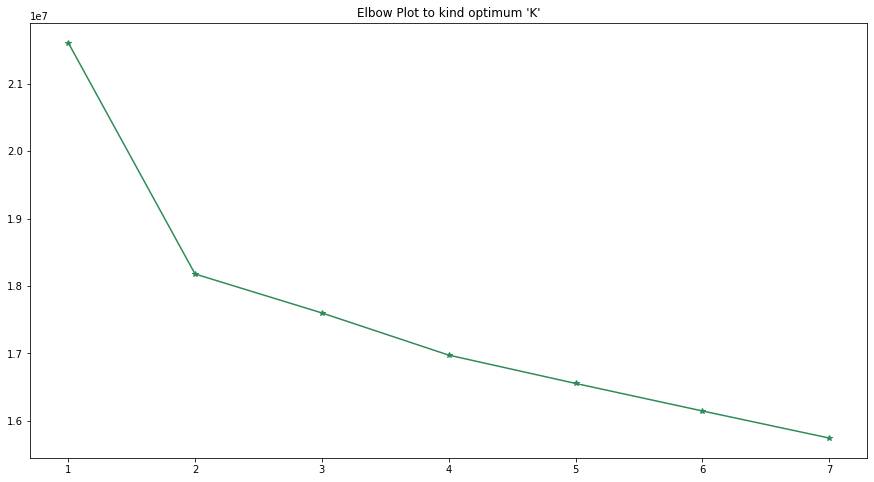

In [50]:
plt.figure(figsize=(15,8))
plt.plot(range(1,8),cl_iner,marker='*',color='seagreen')
plt.title("Elbow Plot to kind optimum 'K'")
plt.show()

In [69]:
km=KMeans(n_clusters=4,n_init=15,random_state=456)

In [70]:

km.fit(abcpca)
y_pred=km.predict(abcpca)
centdf=pd.DataFrame(km.cluster_centers_)
centdf

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-2.404077,1.327560,2.548107,-0.951845,0.226220,-0.004277,0.087957,0.041953,-0.037819,0.019480,...,0.023810,0.013472,-0.011147,-0.005326,-0.008542,0.027430,0.054664,0.088153,-0.087276,0.020382
1,-2.594146,-2.236871,-0.166074,0.557888,0.949336,-0.184698,0.015399,0.008024,-0.045016,0.029228,...,-0.020091,0.017911,-0.000886,-0.001544,0.004917,-0.000950,-0.014063,-0.060603,0.172140,-0.025351
2,4.858556,-0.089995,0.028253,0.026561,0.009801,0.068991,-0.057508,0.060776,0.065058,-0.053344,...,-0.015163,0.012559,-0.002570,-0.005260,-0.000562,-0.008938,-0.016231,0.004441,-0.010653,0.016241
3,-2.293131,1.228169,-1.405213,0.057026,-0.955229,0.075730,0.004872,-0.105920,-0.018602,0.028653,...,0.021498,-0.038589,0.010509,0.010895,0.001566,-0.004563,-0.000647,-0.006093,-0.081889,-0.010318


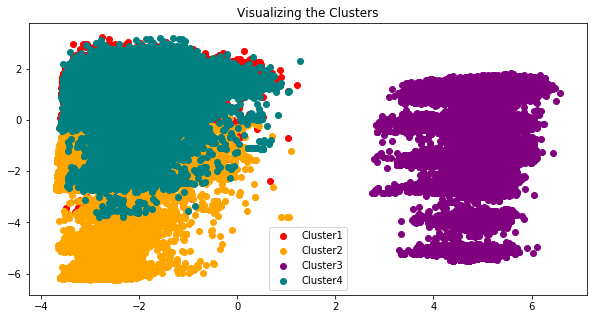

In [71]:
# Plot and See
plt.figure(figsize=(10,5))
plt.scatter(abcpca.iloc[y_pred==0, 0], abcpca.iloc[y_pred==0,1], 
            color = "red", label = "Cluster1")

plt.scatter(abcpca.iloc[y_pred==1, 0], abcpca.iloc[y_pred==1,1], 
            color = "orange", label = "Cluster2")

plt.scatter(abcpca.iloc[y_pred==2, 0], abcpca.iloc[y_pred==2,1], 
            color = "purple", label = "Cluster3")

plt.scatter(abcpca.iloc[y_pred==3, 0], abcpca.iloc[y_pred==3,1], 
            color = "teal", label = "Cluster4")
plt.title('Visualizing the Clusters')
plt.legend()
plt.show()

In [72]:
km=KMeans(n_clusters=2,n_init=15,random_state=456)
km.fit(abcpca)
y_pred=km.predict(abcpca)
centdf=pd.DataFrame(km.cluster_centers_)
centdf

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,4.858556,-0.089995,0.028253,0.026561,0.009801,0.068991,-0.057508,0.060776,0.065058,-0.053344,...,-0.015163,0.012559,-0.002570,-0.005260,-0.000562,-0.008938,-0.016231,0.004441,-0.010653,0.016241
1,-2.424941,0.044904,-0.014103,-0.013269,-0.004891,-0.034431,0.028702,-0.030333,-0.032469,0.026628,...,0.007568,-0.006268,0.001284,0.002625,0.000281,0.004460,0.008100,-0.002217,0.005320,-0.008106


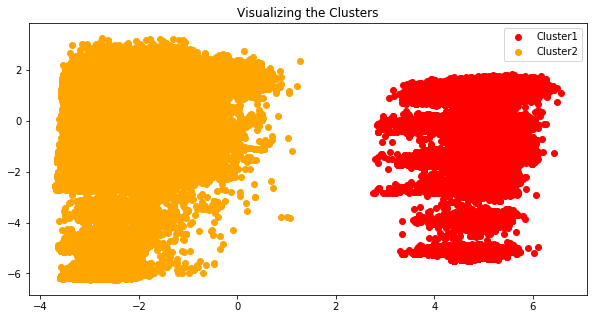

In [73]:
# Plot and See
plt.figure(figsize=(10,5))
plt.scatter(abcpca.iloc[y_pred==0, 0], abcpca.iloc[y_pred==0,1], 
            color = "red", label = "Cluster1")

plt.scatter(abcpca.iloc[y_pred==1, 0], abcpca.iloc[y_pred==1,1], 
            color = "orange", label = "Cluster2")


plt.title('Visualizing the Clusters')
plt.legend()
plt.show()

In [84]:
#s=pd.DataFrame({'Km':km.labels_,'Original':d.case_status})
s[s.Km==1]
s.Km.value_counts()

1    194127
0     96890
Name: Km, dtype: int64

In [85]:
d.case_status.value_counts()

0    140455
1    115078
2     20153
3     15331
Name: case_status, dtype: int64

In [86]:
140455+20153

160608

In [67]:
from sklearn.cluster import AgglomerativeClustering

In [81]:
m=AgglomerativeClustering(n_clusters=4)
m.fit(abcpca)


MemoryError: 